# Notebook de nettoyage - Adrian Rodriguez - Projet 3 parcours Ingénieur Machine Learning

---
# 0. Contexte


Vous êtes consultant pour Olist, une solution de vente sur les marketplaces en ligne.

Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

### Les données
Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

### Votre mission
Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

Pour des raisons de confidentialité, Olist ne fournit pas beaucoup de données, à vous de fouiller dans celles dont vous disposez et de créer les meilleures features pour les exploiter.

Enfin, votre client, Olist, a spécifié sa demande ainsi :

- La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
- Vous évaluerez la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
- Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

---
# 1. Importation et exploration préliminaire

## 1-1. Découverte des fichiers CSV

In [3]:
import pandas as pd
import glob
import os
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from functions import *

pd.options.display.max_columns = None
plt.style.use("default")

In [4]:
# Pour vérifier le respect de la convention PEP8
# Installation conda non diponible. Utiliser pip
%load_ext pycodestyle_magic
%pycodestyle_on

In [5]:
df_dict = {}
for file in glob.glob('src/olist/*csv'):
    df_name = file.replace('src/olist\\', 'df_').replace('olist_', '')
    df_name = df_name.replace('_dataset.csv', '').replace('.csv', '')
    print(df_name)
    df_dict[df_name] = pd.read_csv(file)

df_customers
df_geolocation
df_orders
df_order_items
df_order_payments
df_order_reviews
df_products
df_sellers
df_product_category_name_translation


In [6]:
for name, df in df_dict.items():
    display(name)
    display(df.info())
    display(df.head())

'df_customers'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


'df_geolocation'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


'df_orders'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


'df_order_items'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


'df_order_payments'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


'df_order_reviews'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


'df_products'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


'df_sellers'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


'df_product_category_name_translation'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<img src="src/relation.png"/>

## 1-2. Association des fichiers CSV

In [7]:
for name, df in df_dict.items():
    display(f'Shape {name} : {df.shape}')

'Shape df_customers : (99441, 5)'

'Shape df_geolocation : (1000163, 5)'

'Shape df_orders : (99441, 8)'

'Shape df_order_items : (112650, 7)'

'Shape df_order_payments : (103886, 5)'

'Shape df_order_reviews : (100000, 7)'

'Shape df_products : (32951, 9)'

'Shape df_sellers : (3095, 4)'

'Shape df_product_category_name_translation : (71, 2)'

Je choisis comment fichier central d'association df_orders, puisqu'il détient 4 relations directes et est le plus proche des clients, cible que je dois segmenter pour cette étude.

Je dispose d'une base de 99 441 commandes. Tout au long des associations des fichiers, je dois m'assurer que chaque jeu de données associées soit sur la même base : 

Fichiers associés :
- **df_customers** : Nombre d'observations identiques aux commandes. Je ne ferais aucune modification.
- **df_products** : Le nombre d'observations est inférieur au nombres d'observations des commandes. Cela ne pose aucun problème particulier, je n'y ferais aucune modification. Ce fichier sera associé au préalable avec df_order_items.
- **df_product_category_name_translation** : Définit les traductions des catégories, ce sera utile pour une meilleure compréhension des personas. Ce fichier sera associé au préalable avec df_products.

Fichiers nécessitant une transformation avant association :
- **df_order_items** : Le nombre d'observations est supérieur au nombres d'observations des commandes. Cela signifie qu'il peut y avoir plusieurs articles par commande. Je dois définir comment transformer ce jeu.
- **df_order_payments** : Le nombre d'observations est supérieur au nombres d'observations des commandes. Cela signifie qu'il peut y avoir plusieurs mode de paiement pour une même commande. Par exemple, une partie en carte de crédit, et une autre partie en bon d'achat. Je dois définir comment transformer ce jeu.
- **df_order_reviews** : Le nombre d'observations est supérieur au nombres d'observations des commandes. Cela signifie qu'il existe peut-être plusieurs avis sur une commande. Je dois définir comment transformer ce jeu

Fichiers non associés :
- **df_geolocation** : Ce jeu apporte en supplément les données de latitude et longitude, je ne m'en servirai pas dans cette étude.
- **df_sellers** : Ce jeu indique la localisation des vendeurs, je ne m'en servirai pas dans cette étude.

### 1-2-1. Traitement de df_order_items

Cette étape de déroulera en 4 phases : 
- Association des fichiers df_order_items, df_products et df_product_category_name_translation,
- Vérification des montants price et freight_value et savoir à quoi ca correspond dans le fichier df_order_payments,
- Transformation de variables dans le but de réduire certaines modalités en vue de la modélisation,
- Grouper les observations par commande en aggrégeant les données au plus pertinent.

**Phase 1 :**  
J'associe les fichiers des produits ainsi que la traduction des catégories

In [8]:
items = pd.merge(df_dict['df_order_items'],
                 df_dict['df_products'],
                 on='product_id')
items = pd.merge(items,
                 df_dict['df_product_category_name_translation'],
                 on='product_category_name',
                 how='left')
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,garden_tools
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,furniture_decor
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0,watches_gifts
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0,sports_leisure


In [9]:
duplicate = items.duplicated(subset='order_id', keep=False)
sort = ['order_id', 'order_item_id']

items[duplicate].sort_values(by=sort).head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
588,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,garden_tools
589,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,garden_tools
1315,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
1316,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
1317,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
1540,001ab0a7578dd66cd4b0a71f5b6e1e41,1,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,eletronicos,53.0,265.0,2.0,150.0,22.0,13.0,15.0,electronics
1541,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,eletronicos,53.0,265.0,2.0,150.0,22.0,13.0,15.0,electronics
1542,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,eletronicos,53.0,265.0,2.0,150.0,22.0,13.0,15.0,electronics
1763,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,beleza_saude,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty
1764,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,beleza_saude,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty


In [10]:
items.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1627
dtype: int64

In [11]:
# J'applique 'unknown' aux valeurs manquantes
# de la variables product_category_name_english
col = 'product_category_name_english'
items[col][items[col].isna()] = 'unknown'

In [12]:
col = ['product_name_lenght',
       'product_description_lenght',
       'product_photos_qty',
       'product_weight_g',
       'product_length_cm',
       'product_height_cm',
       'product_width_cm']

items[col] = items[col].fillna(0)

In [13]:
items.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
product_category_name_english       0
dtype: int64

**Phase 2 :**   
Pour une même commande, je vais chercher à savoir à quoi correspond `price` et `freight_value` du dataframe.

In [14]:
order_id = '002f98c0f7efd42638ed6100ca699b42'

items[items.order_id == order_id]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
2198,002f98c0f7efd42638ed6100ca699b42,1,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,2017-08-10 09:30:15,8.99,32.57,consoles_games,44.0,228.0,1.0,450.0,30.0,7.0,25.0,consoles_games
2207,002f98c0f7efd42638ed6100ca699b42,2,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,2017-08-10 09:30:15,44.90,7.16,brinquedos,45.0,589.0,4.0,200.0,16.0,7.0,11.0,toys


In [15]:
items[items.order_id == order_id]\
    .groupby('order_id')[['price', 'freight_value']].sum()\
    .sum(axis=1)

order_id
002f98c0f7efd42638ed6100ca699b42    93.62
dtype: float64

In [16]:
df_dict['df_order_payments'][df_dict['df_order_payments'].order_id == order_id]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
74620,002f98c0f7efd42638ed6100ca699b42,1,credit_card,9,93.62


Les sommes des prix des articles et frais d'envoi d'une commande dans dans ce jeu de données

**Phase 3 :**      
Je réduis le nombre de catégories produit et je créé des classe sur le nombre de photos par article et sur la longueur textuelle de la description.

In [17]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [18]:
cat = pd.read_excel('dictionnaire.xlsx', sheet_name='category')

items = pd.merge(items, cat)

items.main_category_fr.value_counts(normalize=True) * 100

Mode Bagage             23.940985
Meuble Déco             20.430902
Informatique             9.801573
Electoménager            7.874044
Sport                    7.810093
Jardin Animalerie        6.166290
Téléphonie               4.331535
Auto Moto                3.814525
Jouets                   3.708241
Librairie                3.059726
Bébé                     2.795817
Bricolage                2.368879
TV Son Photo             1.109680
Alimentation Boisson     1.051134
Jeux Vidéo               1.024112
Autres                   0.712465
Name: main_category_fr, dtype: float64

Je crée la variable n_photos_class qui a pour critère suivant :
- Pas de photo, Classe = 0,
- 1 photo dans la fiche produit, Classe = 1,
- 2 ou 3 photos dans la fiche produit, Classe = 2,
- 4 photos ou plus dans la fiche produit, Classe = 3

In [19]:
items['n_photos_class'] = 0

items['n_photos_class'][items.product_photos_qty == 1] = 1

cond = (items.product_photos_qty >= 2) & (items.product_photos_qty < 4)
items['n_photos_class'][cond] = 2

items['n_photos_class'][items.product_photos_qty >= 4] = 3

items['n_photos_class'].value_counts()

1    56019
2    34351
3    20653
Name: n_photos_class, dtype: int64

Je créé la variable len_desc_class qui divise en 4 classes les longueurs des descriptions des fiches produits selon ses percentiles.

In [20]:
len_desc_quartiles = pd.qcut(items['product_description_lenght'],
                             4,
                             labels=range(1, 5))

items = items.assign(len_desc_class=len_desc_quartiles)
items.len_desc_class.value_counts()

1    28282
4    27733
3    27579
2    27429
Name: len_desc_class, dtype: int64

In [21]:
columns = ['order_item_id',
           'main_category_fr',
           'n_photos_class',
           'len_desc_class',
           'price',
           'freight_value']

aggdict = {'order_item_id': lambda x: x.count(),
           'main_category_fr': lambda x: x.value_counts().index[0],
           'n_photos_class': lambda x: x.value_counts().index[0],
           'len_desc_class': lambda x: x.value_counts().index[0],
           'price': lambda x: x.sum(),
           'freight_value': lambda x: x.sum()}

order_items = items.groupby('order_id')[columns].agg(aggdict)\
                                  .sort_values(by='order_item_id')

order_items = order_items.rename(columns={'order_item_id': 'n_item',
                                          'price': 'order_amount',
                                          'freight_value': 'freight_amount'})
order_items

,n_item,main_category_fr,n_photos_class,len_desc_class,order_amount,freight_amount
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,Mode Bagage,3,2,58.90,13.29
a6e7e7222c014201fbfcdfb8c4593ce7,1,Electoménager,1,3,85.00,14.20
a6e7a9c6f4effc360a418d5bba41ba03,1,Mode Bagage,1,2,99.40,11.72
a6e75a284bbd3aa94f0e329d2522f996,1,Electoménager,3,3,111.90,12.12
a6e72869e355a73024a941ae6ec91919,1,Informatique,2,4,265.99,9.12
...,...,...,...,...,...,...
428a2f660dc84138d969ccd69a0ab6d5,15,Meuble Déco,2,4,982.35,243.30
9ef13efd6949e4573a18964dd1bbe7f5,15,Jardin Animalerie,2,2,765.00,18.00
1b15974a0141d54e36626dca3fdc731a,20,Informatique,1,2,2000.00,202.40


In [22]:
sum_order = ['order_amount', 'freight_amount']
order_items['total_order_amount'] = order_items[sum_order].sum(axis=1)

order_items['ratio_freight_amount'] = round(
                                        order_items['freight_amount']
                                        / order_items['total_order_amount']
                                        * 100, 2)
order_items

,n_item,main_category_fr,n_photos_class,len_desc_class,order_amount,freight_amount,total_order_amount,ratio_freight_amount
order_id,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,Mode Bagage,3,2,58.90,13.29,72.19,18.41
a6e7e7222c014201fbfcdfb8c4593ce7,1,Electoménager,1,3,85.00,14.20,99.20,14.31
a6e7a9c6f4effc360a418d5bba41ba03,1,Mode Bagage,1,2,99.40,11.72,111.12,10.55
a6e75a284bbd3aa94f0e329d2522f996,1,Electoménager,3,3,111.90,12.12,124.02,9.77
a6e72869e355a73024a941ae6ec91919,1,Informatique,2,4,265.99,9.12,275.11,3.32
...,...,...,...,...,...,...,...,...
428a2f660dc84138d969ccd69a0ab6d5,15,Meuble Déco,2,4,982.35,243.30,1225.65,19.85
9ef13efd6949e4573a18964dd1bbe7f5,15,Jardin Animalerie,2,2,765.00,18.00,783.00,2.30
1b15974a0141d54e36626dca3fdc731a,20,Informatique,1,2,2000.00,202.40,2202.40,9.19


### 1-2-2. Traitement de df_order_payments   
Cette étape de déroulera en 2 phases : 
- Compréhension du paiement séquentiel et payment value par rapport au valeur de df_order_items
- Grouper les observations par commande en aggrégeant les données au plus pertinent.

In [23]:
df_dict['df_order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [24]:
duplicate = df_dict['df_order_payments'].duplicated(subset='order_id',
                                                    keep=False)
sort = ['order_id', 'payment_sequential']

df_dict['df_order_payments'][duplicate].sort_values(by=sort).head(20)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45


Je vérifie à quoi correspond la somme des paiements séquentiels sur une commande.

In [25]:
order_id = '009ac365164f8e06f59d18a08045f6c4'
condition = df_dict['df_order_payments'].order_id == order_id

df_dict['df_order_payments'][condition].sort_values(by='payment_sequential')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17


In [26]:
condition = df_dict['df_order_payments'].order_id == order_id

df_dict['df_order_payments'][condition]\
    .groupby('order_id')['payment_value']\
    .sum()

order_id
009ac365164f8e06f59d18a08045f6c4    32.0
Name: payment_value, dtype: float64

In [27]:
items[items.order_id == order_id][['price', 'freight_value']].sum(axis=1)

18410    32.0
dtype: float64

La somme des paiements séquentiels sur une commande est bien égal au total de la commande

In [28]:
# Je créé une nouvelle colonne contenant le type de payement
# afin de compter les différents moyen de paiement d'une commande
payments = df_dict['df_order_payments']
payments['payment_type_bis'] = payments['payment_type']

columns = ['payment_sequential',
           'payment_type',
           'payment_type_bis',
           'payment_value']

aggdict = {'payment_sequential': lambda x: x.count(),
           'payment_type': lambda x: x.value_counts().index[0],
           'payment_type_bis': lambda x: x.nunique(),
           'payment_value': lambda x: x.sum()}

order_payments = payments.groupby('order_id')[columns].agg(aggdict)


columns = {'payment_sequential': 'n_payment',
           'payment_type': 'prefered_payment',
           'payment_type_bis': 'n_payment_type',
           'payment_value': 'total_paid'}

order_payments = order_payments.rename(columns=columns)

order_payments

,n_payment,prefered_payment,n_payment_type,total_paid
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,1,72.19
00018f77f2f0320c557190d7a144bdd3,1,credit_card,1,259.83
000229ec398224ef6ca0657da4fc703e,1,credit_card,1,216.87
00024acbcdf0a6daa1e931b038114c75,1,credit_card,1,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,1,218.04
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
fffce4705a9662cd70adb13d4a31832d,1,credit_card,1,116.85


### 1-2-3. Traitement de df_order_reviews

In [29]:
df_dict['df_order_reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [30]:
df_dict['df_order_reviews'].groupby('order_id')['review_id'].count()\
                           .value_counts()

1    98886
2      551
3        4
Name: review_id, dtype: int64

Je constate que les données des avis conservent l'historique des avis. Il peut donc y avoir plusieurs notation sur une commande. Je conserve l'avis le plus récent concernant une commande.

In [31]:
order_reviews = df_dict['df_order_reviews']\
                                .sort_values(by=['order_id',
                                                 'review_answer_timestamp'])\
                                .drop_duplicates(subset='order_id',
                                                 keep='last')
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52372,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
28025,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
4244,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
39133,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
56106,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...
48559,9185f849f32d82e216a4e025e0c50f5c,fffc94f6ce00a00581880bf54a75a037,5,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
21844,be803f6a93d64719fd685c1cc610918a,fffcd46ef2263f404302a634eb57f7eb,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
37790,dbdd81cd59a1a9f94a10a990b4d48dce,fffce4705a9662cd70adb13d4a31832d,5,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
50858,fba117c9ac40d41ca7be54741f471303,fffe18544ffabc95dfada21779c9644f,5,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


### 1-2-4. Traitement de df_orders

In [32]:
orders = df_dict['df_orders']
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [33]:
# Conversion des variables dates
timestamp = ['order_purchase_timestamp',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']

for t in timestamp:
    orders[t] = pd.to_datetime(orders[t],
                               format="%Y-%m-%d %H:%M:%S")

Je créé un variable de période trimestrielle

In [34]:
orders['period'] = orders.order_purchase_timestamp.dt.year.astype(str)\
                + '-Q'\
                + orders.order_purchase_timestamp.dt.quarter.astype(str)

Je créé aussi une variable me permettrant de savoir si le délai de livraison a été respecté :    
0 = N'a jamais recu le colis, soit par commande annulée, soit jamais reçu le colis ou quelconque raisons   
1 = A reçu le colis en retard   
2 = A reçu le colis dans le délai requis

In [60]:
orders['delay_delivery'] = orders.order_estimated_delivery_date\
                          - orders.order_delivered_customer_date
days = dt.timedelta(days=0)

orders['delivery_respect'] = 0
orders['delivery_respect'][orders['delay_delivery'] < days] = 1
orders['delivery_respect'][orders['delay_delivery'] >= days] = 2
round(orders.delivery_respect.value_counts(normalize=True), 2)

2    0.89
1    0.08
0    0.03
Name: delivery_respect, dtype: float64

88% des commandes ont été livrées dans les temps

In [36]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-Q4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-Q3
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-Q3
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-Q4
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-Q1


### 1-2-5. Association des fichiers   
Je surveille que le nombre d'observations n'augemente pas au fur et a mesure des associations.

In [62]:
# Base centrale
display(orders.shape)

# Association du fichier customer
sales_raw = pd.merge(orders,
                     df_dict['df_customers'],
                     on='customer_id')
display(sales_raw.shape)

# Association des items
sales_raw = pd.merge(sales_raw,
                     order_items,
                     on='order_id',
                     how='outer')
display(sales_raw.shape)

# Association des paiements
sales_raw = pd.merge(sales_raw,
                     order_payments,
                     on='order_id',
                     how='outer')
display(sales_raw.shape)

# Association des avis
sales_raw = pd.merge(sales_raw,
                     order_reviews,
                     on='order_id',
                     how='outer')
display(sales_raw.shape)

# Affichage du dataset
sales_raw.head()

(99441, 11)

(99441, 15)

(99441, 23)

(99441, 27)

(99441, 33)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,period,delay_delivery,delivery_respect,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,n_item,main_category_fr,n_photos_class,len_desc_class,order_amount,freight_amount,total_order_amount,ratio_freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-Q4,7 days 02:34:47,2,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,Electoménager,3.0,1.0,29.99,8.72,38.71,22.53,3.0,voucher,2.0,38.71,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-Q3,5 days 08:32:15,2,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,Mode Bagage,1.0,1.0,118.70,22.76,141.46,16.09,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-Q3,17 days 05:53:31,2,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,Auto Moto,1.0,1.0,159.90,19.22,179.12,10.73,1.0,credit_card,1.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-Q4,12 days 23:31:18,2,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,Jardin Animalerie,2.0,2.0,45.00,27.20,72.20,37.67,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-Q1,9 days 05:42:58,2,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,Librairie,3.0,1.0,19.90,8.72,28.62,30.47,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [63]:
sales_raw.dtypes

order_id                                  object
customer_id                               object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_approved_at                         object
order_delivered_carrier_date              object
order_delivered_customer_date     datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
period                                    object
delay_delivery                   timedelta64[ns]
delivery_respect                           int64
customer_unique_id                        object
customer_zip_code_prefix                   int64
customer_city                             object
customer_state                            object
n_item                                   float64
main_category_fr                          object
n_photos_class                           float64
len_desc_class                           float64
order_amount                             float64
freight_amount      

In [64]:
sales_raw.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'period', 'delay_delivery', 'delivery_respect', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state', 'n_item',
       'main_category_fr', 'n_photos_class', 'len_desc_class', 'order_amount',
       'freight_amount', 'total_order_amount', 'ratio_freight_amount',
       'n_payment', 'prefered_payment', 'n_payment_type', 'total_paid',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [87]:
columns = ['order_id',
           'order_status',
           'order_purchase_timestamp',
           'delivery_respect',
           'period',
           'customer_unique_id',
           'n_item',
           'main_category_fr',
           'n_photos_class',
           'len_desc_class',
           'total_order_amount',
           'ratio_freight_amount',
           'n_payment',
           'prefered_payment',
           'n_payment_type',
           'total_paid',
           'review_score']

sales = sales_raw[columns].copy()

sales.head()

,order_id,order_status,order_purchase_timestamp,delivery_respect,period,customer_unique_id,n_item,main_category_fr,n_photos_class,len_desc_class,total_order_amount,ratio_freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2,2017-Q4,7c396fd4830fd04220f754e42b4e5bff,1.0,Electoménager,3.0,1.0,38.71,22.53,3.0,voucher,2.0,38.71,4
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2,2018-Q3,af07308b275d755c9edb36a90c618231,1.0,Mode Bagage,1.0,1.0,141.46,16.09,1.0,boleto,1.0,141.46,4
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2,2018-Q3,3a653a41f6f9fc3d2a113cf8398680e8,1.0,Auto Moto,1.0,1.0,179.12,10.73,1.0,credit_card,1.0,179.12,5
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2,2017-Q4,7c142cf63193a1473d2e66489a9ae977,1.0,Jardin Animalerie,2.0,2.0,72.20,37.67,1.0,credit_card,1.0,72.20,5
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2,2018-Q1,72632f0f9dd73dfee390c9b22eb56dd6,1.0,Librairie,3.0,1.0,28.62,30.47,1.0,credit_card,1.0,28.62,5


---
# 2. Vérification de la qualité des données
## 2-1. Vérification du contenu dupliqué

In [88]:
sales[sales.duplicated(subset='order_id')]

,order_id,order_status,order_purchase_timestamp,delivery_respect,period,customer_unique_id,n_item,main_category_fr,n_photos_class,len_desc_class,total_order_amount,ratio_freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score


Il n'y a pas de commandes dupliquées

## 2-2. Vérification des valeurs manquantes

In [89]:
sales.isna().sum()

order_id                       0
order_status                   0
order_purchase_timestamp       0
delivery_respect               0
period                         0
customer_unique_id             0
n_item                      2185
main_category_fr            2185
n_photos_class              2185
len_desc_class              2185
total_order_amount          2185
ratio_freight_amount        2185
n_payment                      1
prefered_payment               1
n_payment_type                 1
total_paid                     1
review_score                   0
dtype: int64

In [90]:
sales[sales.n_item.isna()]

,order_id,order_status,order_purchase_timestamp,delivery_respect,period,customer_unique_id,n_item,main_category_fr,n_photos_class,len_desc_class,total_order_amount,ratio_freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score
6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,0,2017-Q2,36edbb3fb164b1f16485364b6fb04c73,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,65.95,2
107,bfe42c22ecbf90bc9f35cf591270b6a7,delivered,2018-01-27 22:04:34,2,2018-Q1,34c58672601f2c6d29db7efd1f6bf958,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,42.40,5
180,58ac1947c1a9067b9f416cba6d844a3f,delivered,2017-09-13 09:18:50,2,2017-Q3,5cbf29b2dcf212a6a5d864b887238c72,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,124.16,5
228,e22b71f6e4a481445ec4527cb4c405f7,delivered,2017-04-22 13:48:18,2,2017-Q2,1268b060098ed3f22c2e7c34cc72a1a8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,34.24,4
263,a094215e786240fcfefb83d18036a1cd,delivered,2018-02-08 18:56:45,2,2018-Q1,f5cb81f98962f7504bef1e75579b6dff,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,132.05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16 14:27:59,0,2018-Q1,a33e0969408919ba06779f497ead93ec,NaN,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,210.09,1
99283,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:44,0,2018-Q3,e90598185d2427a35e32ef241a5c04aa,NaN,NaN,NaN,NaN,NaN,NaN,1.0,voucher,1.0,63.89,5
99347,a89abace0dcc01eeb267a9660b5ac126,canceled,2018-09-06 18:45:47,0,2018-Q3,d05c44a138277ad325d915c6b7ccbcdf,NaN,NaN,NaN,NaN,NaN,NaN,1.0,voucher,1.0,107.13,4
99348,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:04,0,2017-Q3,e72a90a2b29fe1a8795b284aaaa3246f,NaN,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,195.91,1


In [91]:
display(sales.order_status[sales_raw.n_item.isna()].value_counts())
display(sales.delivery_respect[sales_raw.n_item.isna()].value_counts())
display(sales.prefered_payment[sales_raw.n_item.isna()].value_counts())
display(sales.review_score[sales_raw.n_item.isna()].value_counts())

delivered      1351
unavailable     603
canceled        180
shipped          25
processing       12
invoiced          9
created           5
Name: order_status, dtype: int64

2    1231
0     834
1     120
Name: delivery_respect, dtype: int64

credit_card    1547
boleto          439
voucher         159
debit_card       37
not_defined       3
Name: prefered_payment, dtype: int64

5    835
1    776
4    313
3    147
2    114
Name: review_score, dtype: int64

In [92]:
round(len(sales[sales_raw.n_item.isna()]) / len(sales) * 100, 2)

2.2

Je trouve des commandes sans panier. Qui sont pour la plupart livrées normalement et payées en carte de crédit.

Il y a une part d'incertitude concernant le traitement de ces commandes payé par le client et sans panier. Est-ce qu'il s'agit d'un problème informatique? Ont-elles été rééllement ont été payées ? Les clients ont-ils été rééllement livrés ?

La proportion de cette incertitude représente 2.2 % du data set. Je décide de m'en séparer.

In [93]:
sales = sales[sales_raw.n_item.notna()]
sales.isna().sum()

order_id                    0
order_status                0
order_purchase_timestamp    0
delivery_respect            0
period                      0
customer_unique_id          0
n_item                      0
main_category_fr            0
n_photos_class              0
len_desc_class              0
total_order_amount          0
ratio_freight_amount        0
n_payment                   1
prefered_payment            1
n_payment_type              1
total_paid                  1
review_score                0
dtype: int64

In [94]:
sales[sales.total_paid.isna()]

,order_id,order_status,order_purchase_timestamp,delivery_respect,period,customer_unique_id,n_item,main_category_fr,n_photos_class,len_desc_class,total_order_amount,ratio_freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score
30710,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,1,2016-Q3,830d5b7aaa3b6f1e9ad63703bec97d23,3.0,Mode Bagage,1.0,4.0,143.46,5.92,NaN,NaN,NaN,NaN,1


Je trouve également une commande sans paiement. Dans le doute et pour une observation, je m'en sépare.

In [95]:
sales = sales[sales_raw.total_paid.notna()]
sales.isna().sum()

order_id                    0
order_status                0
order_purchase_timestamp    0
delivery_respect            0
period                      0
customer_unique_id          0
n_item                      0
main_category_fr            0
n_photos_class              0
len_desc_class              0
total_order_amount          0
ratio_freight_amount        0
n_payment                   0
prefered_payment            0
n_payment_type              0
total_paid                  0
review_score                0
dtype: int64

Je vérifie que le total commande correspond bien au total payé par le client

In [96]:
balance = sales['total_order_amount'] - sales['total_paid']
balance.value_counts()

 0.000000e+00    77827
 1.421085e-14     3982
-7.105427e-15     3706
 2.842171e-14     3203
-1.421085e-14     2827
                 ...  
-2.198000e+01        1
-3.190000e+00        1
-5.620000e+00        1
-1.140000e+01        1
-2.401000e+01        1
Length: 367, dtype: int64

In [97]:
sales[round(sales.total_order_amount, 2) != round(sales.total_paid, 2)]

,order_id,order_status,order_purchase_timestamp,delivery_respect,period,customer_unique_id,n_item,main_category_fr,n_photos_class,len_desc_class,total_order_amount,ratio_freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score
306,f04bfdbef5359607d39e66fccc9cc0de,delivered,2017-09-13 15:07:45,2,2017-Q3,74182c655b0270d9dde23ca43bb16a2e,4.0,Bricolage,2.0,2.0,998.50,27.74,1.0,credit_card,1.0,998.49,1
464,8adafb3466daa5395694d3a906ff9d40,delivered,2017-01-25 15:47:27,2,2017-Q1,6ad46014a4203440c38e3dbf7aedf51c,6.0,Sport,1.0,2.0,218.02,22.94,1.0,credit_card,1.0,218.00,3
706,d5211af24819d319c02a285e7bb51750,delivered,2018-08-03 16:29:05,2,2018-Q3,a5931be4783e1a1dfbda5c6e145d96bb,6.0,Mode Bagage,1.0,3.0,186.75,14.44,1.0,credit_card,1.0,186.76,4
867,bb2e64c3040ceb9b7ca2bfc602adca08,delivered,2017-11-03 11:29:00,2,2017-Q4,45677f94e9a07652cc2eb351dd542476,4.0,Meuble Déco,1.0,1.0,257.36,3.64,1.0,credit_card,1.0,257.34,5
969,9b2fa9acfe395734a133a58bcbfb9776,delivered,2018-04-25 01:03:27,2,2018-Q2,5d3e6a61592164c2924ccec5c7f56058,1.0,Sport,1.0,2.0,113.61,20.87,1.0,credit_card,1.0,318.37,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99180,469f0b908881368c45917f1bed8240ce,delivered,2017-01-24 21:35:25,2,2017-Q1,753edf44d14afd72110c66fb22b69c91,1.0,Jouets,2.0,2.0,84.20,20.44,1.0,credit_card,1.0,95.17,5
99193,87a71a39b50dac1a8ad74cddfaa82703,delivered,2018-01-30 10:22:13,2,2018-Q1,6109a7fbc9a9010872da7936b99c5433,1.0,Bébé,3.0,2.0,73.43,18.30,1.0,credit_card,1.0,83.00,5
99281,63cb2376233663b05e9beb6bd9206c65,delivered,2017-07-03 23:02:33,2,2017-Q3,bf71e1d9dd5f362875657a46ca04fb28,1.0,Bébé,2.0,2.0,72.94,18.43,1.0,credit_card,1.0,84.25,5
99312,f930a1f6247ed00d6fa9d8a09782c7b4,delivered,2018-06-05 12:28:11,2,2018-Q2,5bc738a48bdb9ca1f798d56de2cce84c,5.0,Jardin Animalerie,2.0,1.0,353.07,29.33,1.0,credit_card,1.0,353.06,5


J'ai également 630 commandes dont le total payment ne correspond pas au total de la commande, au centimes près. Ceci dit, cela n'est pas génant et je ne m'attarderais pas sur ce sujet.

---
# 3. Caractéristiques commerciales de la place de marché Olist
## 3-1. Volume de commandes par trimestre

In [98]:
sales.period.value_counts().sort_index()

2016-Q3        2
2016-Q4      307
2017-Q1     5048
2017-Q2     9065
2017-Q3    12328
2017-Q4    17347
2018-Q1    20692
2018-Q2    19821
2018-Q3    12645
Name: period, dtype: int64

Les trimestres 3 et 4 de l'année 2016 présentent un nombre de commande très faible par rapport aux autres trimestre. Dans l'attente de confirmer avec Olist cette ambiguïté, j'écarte ces périodes pour la suite de mon étude.

In [99]:
list = ['2016-Q3', '2016-Q4']
for l in list:
    sales = sales[sales.period != l]

sales.period.value_counts().sort_index()

2017-Q1     5048
2017-Q2     9065
2017-Q3    12328
2017-Q4    17347
2018-Q1    20692
2018-Q2    19821
2018-Q3    12645
Name: period, dtype: int64

## 3-3. Cas des commandes annulées

In [100]:
sales[sales.order_status == 'canceled']

,order_id,order_status,order_purchase_timestamp,delivery_respect,period,customer_unique_id,n_item,main_category_fr,n_photos_class,len_desc_class,total_order_amount,ratio_freight_amount,n_payment,prefered_payment,n_payment_type,total_paid,review_score
397,1b9ecfe83cdc259250e1a8aca174f0ad,canceled,2018-08-04 14:29:27,0,2018-Q3,8ea097b1824dbd4d17af71b0afe04301,1.0,Informatique,2.0,4.0,33.34,25.01,1.0,boleto,1.0,33.34,1
613,714fb133a6730ab81fa1d3c1b2007291,canceled,2018-01-26 21:34:08,0,2018-Q1,c4ebedb09beb89cc0314c5c0c33f8053,1.0,Meuble Déco,2.0,1.0,96.01,27.20,1.0,credit_card,1.0,96.01,1
1058,3a129877493c8189c59c60eb71d97c29,canceled,2018-01-25 13:34:24,0,2018-Q1,11c3d6c93dea6ce86769a4835c171bd9,1.0,Sport,1.0,4.0,51.00,29.61,2.0,voucher,2.0,51.00,1
1811,0966b61e30c4a07edbd7523f59b3f3e4,canceled,2018-05-22 18:50:55,0,2018-Q2,da4f38e2697f8013c97ed2d8af65e0b9,3.0,Meuble Déco,3.0,2.0,274.11,25.24,1.0,credit_card,1.0,274.11,1
1819,9021cf1919f615a121410790dcce848f,canceled,2018-07-04 16:05:56,0,2018-Q3,54d7a15160876f86860fd741b906a742,1.0,Mode Bagage,2.0,2.0,233.87,6.36,1.0,boleto,1.0,233.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98496,2be6c8b958e16856397259974d4abee9,canceled,2018-04-02 18:20:00,0,2018-Q2,4e5fccc1c335360bbc4a9aac8491e477,1.0,Mode Bagage,2.0,2.0,617.81,9.84,1.0,credit_card,1.0,617.81,1
98629,f5f8998eee8ec7bc513dc52847d64ce0,canceled,2018-03-01 11:42:23,0,2018-Q1,149164aee69ed656dedbbe68623157bc,1.0,Meuble Déco,1.0,1.0,102.09,21.74,1.0,credit_card,1.0,102.09,1
98771,5a8a4dc28b16fb90469ad749f9535773,canceled,2018-03-13 10:58:09,0,2018-Q1,82ec5f749b66f1857e868b6414a67ab3,2.0,Jardin Animalerie,1.0,3.0,321.34,7.26,1.0,boleto,1.0,321.34,5
98791,b159d0ce7cd881052da94fa165617b05,canceled,2017-03-11 19:51:36,0,2017-Q1,78a159045124eb7601951b917a42034f,1.0,Auto Moto,2.0,1.0,30.66,35.75,1.0,credit_card,1.0,30.66,1


Olist est un regroupement de marchand. Il n'est qu'un intermédiaire entre des clients et des vendeurs. Il les met en relation moyennant une commission sur chaque vente. Même si Olist fait signer une charte de vente à ses vendeurs, il ne la respectent pas forcément. notamment au niveau de la gestion du stock.

Lorsqu'un client passe commande chez un vendeur, il peut se passer plusieurs cas :
- L'article est en stock, est approuvé et expédié, et le client reçoit sa commande dans les temps ou en retard,
- L'article est en stock, est approuvé et expédié, et le client ne recoit "jamais" sa commande, à tort ou à raison. Il porte réclamation et demande remboursement auprès d'Olist. Le vendeur peut refuser car le service de livraison lui indique le colis comme livré.
- L'article est en stock, est approuvé et expédié, et le client reçoit une article différent de ce qu'il a commandé, à tort ou à raison. Il y a une erreur de la part du vendeur et une solution doit être trouver.
- L'article n'est pas en stock, est approuvé et marque la commande comme expédiée pour respecter la date limite d'expédition, en espérant expédier rééllement le colis dans les prochains jours. Cela peut occasionner des commandes en retard ou jamais livrées. Coté vendeur, cela permet de ne pas louper une vente.
- L'article n'est pas en stock, n'est pas approuvé ni expédié et le vendeur annule la commande, ou pas. Dans les 2 cas, le client n'aura jamais la commande qu'il aura acheté, sera remboursé par Olist, et ce la fera un client mécontent.

Si la gestion du stock et la livraison sont correctement gérées par le vendeur, les problèmes sont minimes. 

En lisant les commentaires des commandes annulées, je m'apercois que nous nous retrouvons dans la plupart des cas cités ci-dessus. Ce sont peut-être des clients qui ne reviendront jamais, mais c'est un client décu de son achat auprès d'Olist et du vendeur. C'est pourquoi je conserve tous les statuts de commande dans mon étude, afin d'avoir une représentation fidèle de la réalité.

In [101]:
sales.order_status.value_counts()

delivered     94862
shipped        1074
canceled        432
invoiced        289
processing      287
approved          2
Name: order_status, dtype: int64

Concernant les autres statuts des commandes, elle sont en cours de livraison, en cours de traitement... mais sont des commandes à part entières. La proportion des commandes en cours étant négligeable, je décide de les conserver.

## 3-4. Chiffres-clés sur les trimestres concernés

In [102]:
display('Chiffres-clés')
display(f'Clients : {sales.customer_unique_id.nunique()}')
display(f'Commandes : {sales.order_id.nunique()}')
display(f'Volume de produits vendus : {sales.n_item.sum()}')

'Chiffres-clés'

'Clients : 93791'

'Commandes : 96946'

'Volume de produits vendus : 110655.0'

## 3-5. Etude du taux de rétention
### 3-5-1. Taux de rétention global

In [103]:
cutomer_order = sales.groupby(['customer_unique_id'])['order_id'].count()
round(cutomer_order.value_counts(normalize=True).head(5) * 100, 2)

1    96.98
2     2.78
3     0.20
4     0.03
5     0.01
Name: order_id, dtype: float64

Presque 97 % des clients n'ont pas recommandé la même année

### 3-2-2. Taux de rétention par cohorte mensuelle

In [104]:
# Récupération des mois de commandes
sales['order_purchase_month'] = sales.order_purchase_timestamp.apply(get_month)
# Récupération de la première date de commande pour le client
sales['cohort_month'] = (sales.groupby('customer_unique_id')
                         ['order_purchase_month'].transform('min'))

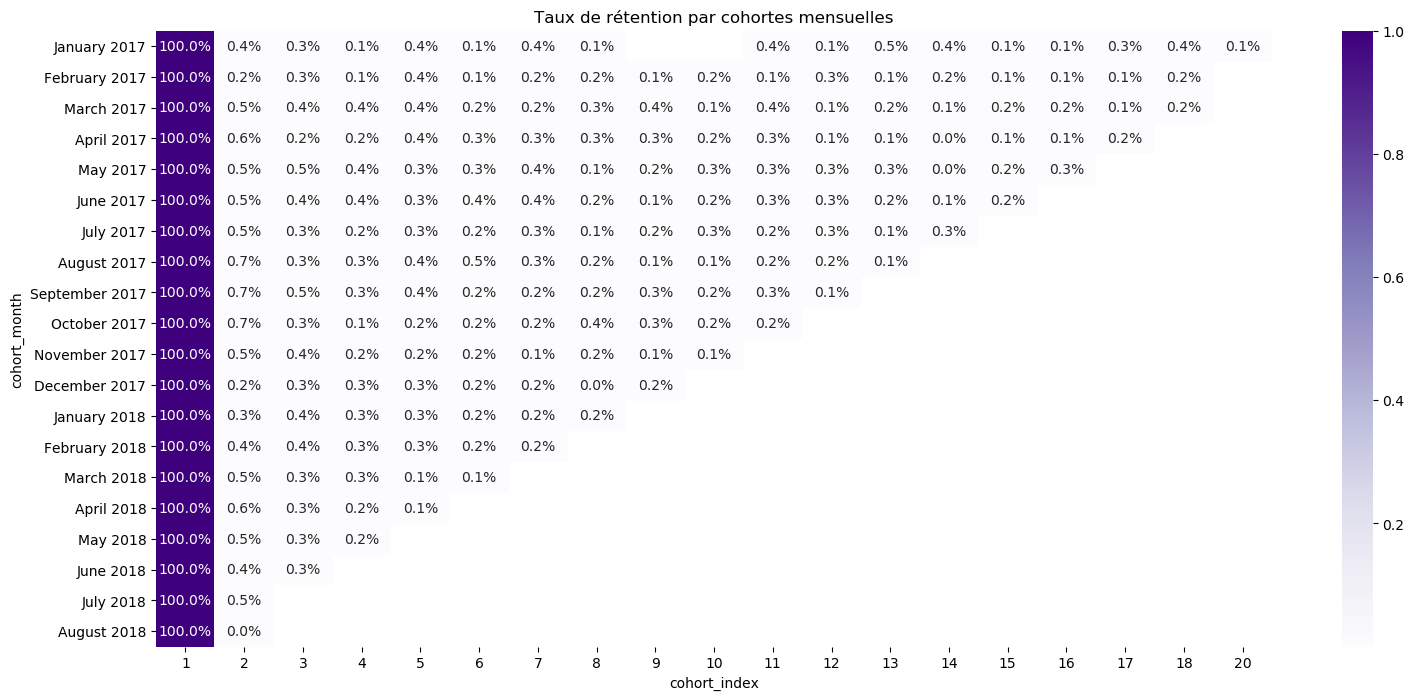

In [105]:
# Calcul en mois de la différence entre la première commande et celle observée
order_purchase_year, order_purchase_month, _ = \
    get_date_int(sales, 'order_purchase_month')

cohort_year, cohort_month, _ = get_date_int(sales, 'cohort_month')

years_diff = order_purchase_year - cohort_year
months_diff = order_purchase_month - cohort_month

sales['cohort_index'] = years_diff * 12 + months_diff + 1

# Construction du tableau pivoté pour observé le taux de rétention
cohort_data = (sales.groupby(['cohort_month', 'cohort_index'])
               ['customer_unique_id'].apply(pd.Series.nunique).reset_index())
cohort_counts = cohort_data.pivot(index='cohort_month',
                                  columns='cohort_index',
                                  values='customer_unique_id')

# Taux de rétention par cohortes mensuelles
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index = retention.index.strftime('%B %Y')

# Affichage du tableau
plt.figure(figsize=(18, 8))
plt.title('Taux de rétention par cohortes mensuelles')
sns.heatmap(retention,
            annot=True,
            fmt='.1%',
            cmap='Purples')

plt.savefig('img/img_retention_map.png',
            dpi=500,
            quality=95,
            transparent=True)

# 4. Export CSV

In [108]:
columns = ['order_id', 
           'order_purchase_timestamp',
           'delivery_respect',
           'period',
           'customer_unique_id',
           'n_item',
           'main_category_fr',
           'n_photos_class',
           'len_desc_class',
           'ratio_freight_amount',
           'prefered_payment',
           'total_paid',
           'review_score']

sales[columns].head()

,order_id,order_purchase_timestamp,delivery_respect,period,customer_unique_id,n_item,main_category_fr,n_photos_class,len_desc_class,ratio_freight_amount,prefered_payment,total_paid,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2,2017-Q4,7c396fd4830fd04220f754e42b4e5bff,1.0,Electoménager,3.0,1.0,22.53,voucher,38.71,4
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2,2018-Q3,af07308b275d755c9edb36a90c618231,1.0,Mode Bagage,1.0,1.0,16.09,boleto,141.46,4
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2,2018-Q3,3a653a41f6f9fc3d2a113cf8398680e8,1.0,Auto Moto,1.0,1.0,10.73,credit_card,179.12,5
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2,2017-Q4,7c142cf63193a1473d2e66489a9ae977,1.0,Jardin Animalerie,2.0,2.0,37.67,credit_card,72.20,5
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2,2018-Q1,72632f0f9dd73dfee390c9b22eb56dd6,1.0,Librairie,3.0,1.0,30.47,credit_card,28.62,5


1:23: W291 trailing whitespace


In [109]:
sales[columns].to_csv('src/sales.csv', index=False)